Algoritmo de Grover #1: Base

Importamos todas los recursos requeridos de las librerías necesarios para desarrollar el trabajo.
A su vez, se utilizan las herramientas por defecto para armar los circuitos en Qiskit
y las herramientas de visualización.

In [18]:
import numpy as np
import math
import qiskit as qiskit
from numpy import sqrt
from random import randint
from qiskit import *
from qiskit import Aer, QuantumCircuit, IBMQ, execute, quantum_info
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor


provider = IBMQ.load_account()
nairobi=provider.get_backend('ibm_nairobi')
print('ejecutado correctamente')

ibmqfactory.load_account:WARNING:2022-11-04 20:37:49,272: Credentials are already in use. The existing account in the session will be replaced.


ejecutado correctamente


A continuación, se procede a armar el circuito cuántico describiendo y/o
definiendo los estados/descripciones del comportamiento del qubit.
Así como las declaraciones (if, elif, else) establecidas al final que básicamente dependiendo el escenario
sucede una forma u otra en el circuito.

In [8]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


print('ejecutado correctamente')



ejecutado correctamente


Esta parte del código, nos permite armar el circuito con la función (QuantumCircuit);
que graficando los valores del random oracle, obtenemos el circuito de abajo.
Nota: este es la base para formar el algoritmo de Grover.

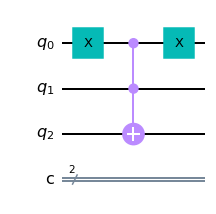

In [13]:
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

random_oracle(circ, 0,1,2)

circ.draw('mpl')


Para mayor obtención de datos procedemos a calcular las compuertas de cada tipo que posee,
así como la profundidad del mismo.

In [15]:
circ.count_ops()


OrderedDict([('x', 2), ('ccx', 1)])

Profundidad del circuito

In [16]:
circ.depth()

3

Transpilamos la parte del cirucito que tenemos y calculamos su profundidad real.

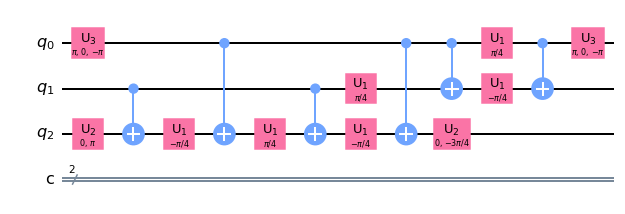

In [19]:
circ2 = qiskit.transpile(circ,basis_gates =['u1', 'u2', 'u3', 'cx'], optimization_level=3)
circ2.draw('mpl')

Profundidad real del circuito

In [20]:
circ2.depth()

12